# SOLUTIONS / MASTER

<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px; margin-bottom: 2vh'>
    
# Session 04 - Project Notebook


<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px'>
     
## Overview 

In this lab, your goal is to learn how to acquire, parse, clean, analyze, and visualize data. Toward this goal, we will address certain question about COVID, and you will scrape data directly from a website. Since real-world problems often require gathering information from a variety of sources, including the Internet, web scraping is a highly useful skill to have. We then ask you to explore, analyze and clean the data before. We'll ask you to come up with some meaningful questions that you can 'ask the data'. Lastly, you will prodcude visualizations that help to identify trends and answer these questions.

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## 1. Obtaining Data
    
For any given situation or scenario that we wish to understand, we will rely on having relevant data. Here, we are interested in the degree to which the SARS-CoV-2 virus has affected United States citizens (SARS-CoV-2 is the virus that causes the COVID-19 disease). The Centers for Disease Control and Prevention (CDC) provides relevant data from USAFacts.org that includes the number of confirmed COVID-19 cases on a per-county basis. Visit https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/. At the bottom of the web page, in a blue table, you should see a list of every state, each of which has its own web page.

In this exercise, we will focus on automating the downloading of each state's data (via Requests). First, as we will do for every Jupyter Notebook, let's import necessary packages that we will use throughout the notebook (i.e., run the cell below)
    


In [97]:
# import all potential libraries you might want to use..
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from time import sleep
from bs4 import BeautifulSoup

In [98]:
# we define this for convenience, as every state's url begins with this prefix
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.1: Fetching Website data via Requests

Fetch the web page located at base_url and save the request's returned object (a Response object) to a variable named home_page.

In [99]:
import requests

# URL of the web page to fetch
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'

# fetch the web page
home_page = requests.get(base_url)

# print the status code to verify the request was successful
print(home_page.status_code)

  
# print the first 500 characters of the content
# print(home_page.text[:500])

200


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.2:
Write a line of code that prints to the screen the status of home_page (the web page's returned object). You should receive a code of 200 if the request was successful; then, write code that prints the entire contents of home_page

In [100]:
# Check if the request was successful
if home_page.status_code == 200:
    # Print the entire contents of the web page
    print(home_page.text)
else:
    print("Failed to retrieve the web page.")
  

<!doctype html><html lang="en"><head><title data-react-helmet="true">US COVID-19 cases and deaths by state | USAFacts</title><meta data-react-helmet="true" http-equiv="X-UA-Compatible" content="IE=edge" /><meta data-react-helmet="true" charSet="utf-8" /><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1" /><meta data-react-helmet="true" name="msapplication-TileColor" content="#E3007D" /><meta data-react-helmet="true" name="theme-color" content="#E3007D" /><meta data-react-helmet="true" name="keywords" content="coronavirus, covid-19, covid-cases, Cases and Deaths" /><meta data-react-helmet="true" name="twitter:site" content="@usafacts" /><meta data-react-helmet="true" name="twitter:title" content="US COVID-19 cases and deaths by state" /><meta data-react-helmet="true" name="twitter:description" content="How is the nation faring against COVID-19, both overall and at a state level? Get the answers here, with data on hotspots and infection rates. Th

In [101]:
# your code here 

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.3:
In the cell below, create a new BeautifulSoup object that parses the home_page as an HTML document (can be done with 1 line of code)

In [102]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(home_page.content, 'html.parser')

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.4:

In the cell below, write code that uses the BeautifulSoup object to parse through the home page in order to extract the the covid cases and deaths for each state. Feel free to use Regular Expressions, in conjunction with any BeautifulSoup parsing. Come up with a data structure or a set of data structures to store that information.

In [103]:
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'
home_page = requests.get(base_url)
soup = BeautifulSoup(home_page.content, 'html.parser')

covid_data = []

table = soup.find('table', {'aria-label': 'sortable data table'})

for row in table.find('tbody').find_all('tr'):
    state = row.find('th').get_text(strip=True)
    columns = row.find_all('td')
    
    cases = int(columns[2].get_text(strip=True).replace(',', ''))
    deaths = int(columns[3].get_text(strip=True).replace(',', ''))

    state_data = {
        'state': state,
        'cases': cases,
        'deaths': deaths
    }
    
    covid_data.append(state_data)

df = pd.DataFrame(covid_data)

In [104]:
df.head()

,state,cases,deaths
0,Alabama,1659936,21138
1,Alaska,287319,1457
2,Arizona,2486671,29852
3,Arkansas,977662,13062
4,California,11300486,102356


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.5:

In the cell below, write code that uses the information scraped from the website/table and create at least two meaningful charts. Make sure to ask meaningful questions that your charts should answer. In case you want to perform some data wrangling to prepare the data for your visualizations, we've included some sample code how to sort a dictionary by values.

In [105]:
# sample code to sort a dictionary by values
markdict = {"Tom":67, "Tina": 54, "Akbar": 87, "Kane": 43, "Divya":73}
marklist = sorted(markdict.items(), key=lambda x:x[1]) # use 1 for sorting values
print(marklist)
sortdict = dict(marklist)
print(sortdict)

[('Kane', 43), ('Tina', 54), ('Tom', 67), ('Divya', 73), ('Akbar', 87)]
{'Kane': 43, 'Tina': 54, 'Tom': 67, 'Divya': 73, 'Akbar': 87}


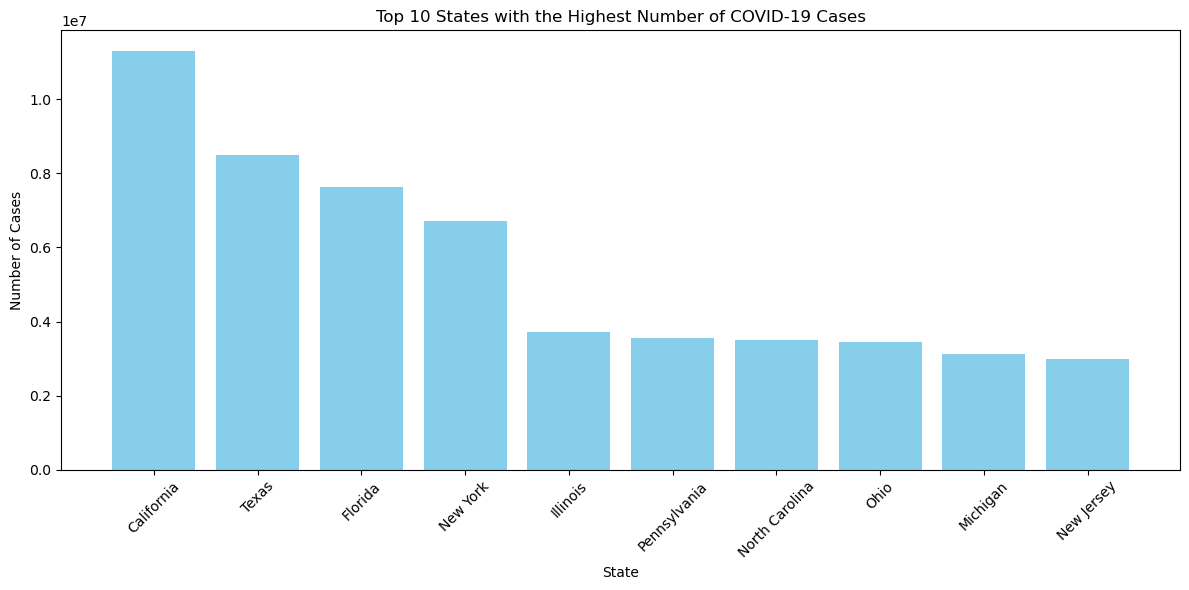

In [106]:
df_sorted_by_cases = df.sort_values(by='cases', ascending=False)
top_10_states_by_cases = df_sorted_by_cases.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_states_by_cases['state'], top_10_states_by_cases['cases'], color='skyblue')
plt.title('Top 10 States with the Highest Number of COVID-19 Cases')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


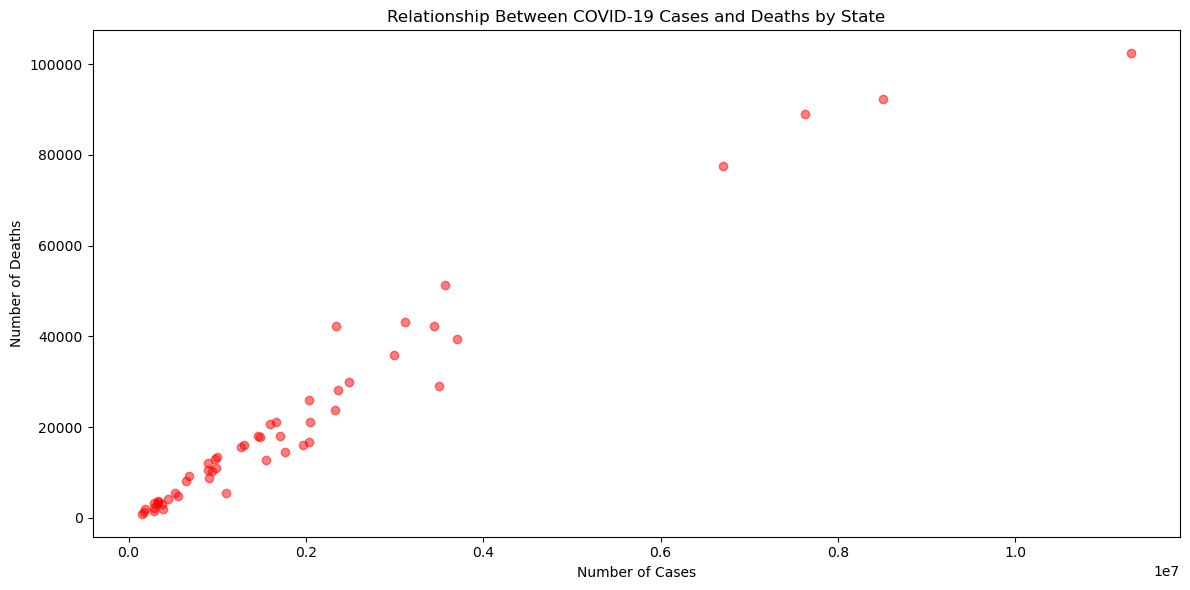

In [107]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['cases'], df['deaths'], alpha=0.5, color='red')
plt.title('Relationship Between COVID-19 Cases and Deaths by State')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.6:

In the cell below, write code that allows you to store all the state links from the main website into the state_urls dictionary. The links are bound to the state abbreviations in the table you were scraping earlier. Look at the page for an individual state to see a county-level table of information. Then, write a loop that scrapes all the counties in that state, as well as the 7-day average cases, 7-day average deaths, cases and deaths for each county. For each state, print all that information into a csv file. Ultimately, you should have one csv file for each state in a new folder called state_covid_data.

In [108]:
state_urls = {}

In [109]:
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'

home_page = requests.get(base_url)
soup = BeautifulSoup(home_page.content, 'html.parser')

state_urls = []

table = soup.find('table', {'aria-label': 'sortable data table'})

for row in table.find('tbody').find_all('tr'):
    state_cell = row.find('th')
    state_name = state_cell.get_text(strip=True)
    state_link = state_cell.find('a')['href']
    full_state_link = 'https://usafacts.org' + state_link
    state_urls.append(full_state_link)

In [110]:
all_state_data = []

for state_url in state_urls:
    print(f"Scraping data for {state_url}")
    state_soup = BeautifulSoup(requests.get(state_url).content, 'html.parser')
    
    county_data = [
        {
            'County': row.find('th').get_text(strip=True),
            '7-Day Average Cases': float(columns[0].get_text(strip=True).replace(',', '')),
            '7-Day Average Deaths': float(columns[1].get_text(strip=True).replace(',', '')),
            'Total Cases': float(columns[2].get_text(strip=True).replace(',', '')),
            'Total Deaths': float(columns[3].get_text(strip=True).replace(',', '')),
            'State URL': state_url
        }
        for row in state_soup.find('table', {'aria-label': 'sortable data table'}).find('tbody').find_all('tr')
        if (columns := row.find_all('td'))
    ]

    df = pd.DataFrame(county_data)
    state_name = state_url.split('/')[-2].replace('-', ' ').title()
    csv_filename = f"data/state_covid_data/{state_name.replace(' ', '_')}_covid_data.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Data for {state_name} saved to {csv_filename}")

    all_state_data.extend(county_data)

pd.DataFrame(all_state_data).to_csv('data/all_states_covid_data.csv', index=False)
print("All state data saved to 'data/all_states_covid_data.csv'")

Scraping data for https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/alabama/
Data for Alabama saved to data/state_covid_data/Alabama_covid_data.csv
Scraping data for https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/alaska/
Data for Alaska saved to data/state_covid_data/Alaska_covid_data.csv
Scraping data for https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/arizona/
Data for Arizona saved to data/state_covid_data/Arizona_covid_data.csv
Scraping data for https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/arkansas/
Data for Arkansas saved to data/state_covid_data/Arkansas_covid_data.csv
Scraping data for https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/california/
Data for California saved to data/state_covid_data/California_covid_data.csv
Scraping data for https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/colorado/
Data for Colorado saved to da

In [111]:
df = pd.read_csv('data/all_states_covid_data.csv')
df.head()

,County,7-Day Average Cases,7-Day Average Deaths,Total Cases,Total Deaths,State URL
0,Autauga County,0.0,0.0,19913.0,235.0,https://usafacts.org/visualizations/coronaviru...
1,Baldwin County,0.0,0.0,70521.0,731.0,https://usafacts.org/visualizations/coronaviru...
2,Barbour County,0.0,0.0,7582.0,104.0,https://usafacts.org/visualizations/coronaviru...
3,Bibb County,0.0,0.0,8149.0,111.0,https://usafacts.org/visualizations/coronaviru...
4,Blount County,0.0,0.0,18872.0,261.0,https://usafacts.org/visualizations/coronaviru...


<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.7:

Lastly, write a function that has two parameters / takes two arguments: a string that should be the a county name, and another string that should be the path to a csv file containing all the counties of all the states (the all-state csv file we made earlier.) The output of the function should be a grouped bar chart for all 4 measures. Each group should contain the value of the county as well as the average value of the state. 

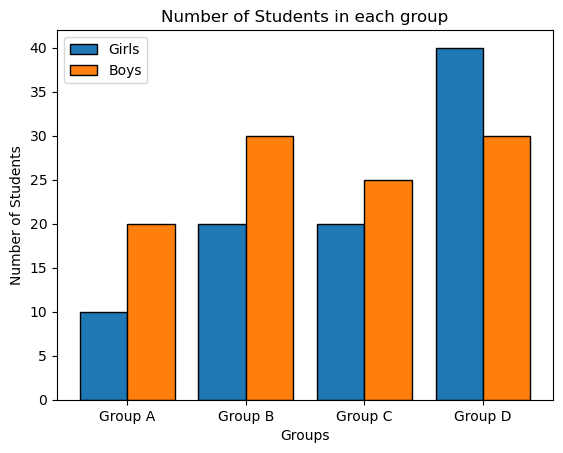

In [112]:
# example for grouped bar chart
  
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls', edgecolor='black')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys', edgecolor='black')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_county_vs_state_avg(county_name, csv_path):
    # Load the CSV file
    data = pd.read_csv(csv_path)
    
    # Filter the data for the specified county
    county_data = data[data['County'] == county_name].iloc[0]
    
    # Calculate state averages
    state_data = data[data['State URL'] == county_data['State URL']]
    state_avg = state_data[['7-Day Average Cases', '7-Day Average Deaths', 'Total Cases', 'Total Deaths']].mean()
    
    # Prepare the data for plotting
    measures = ['7-Day Average Cases', '7-Day Average Deaths', 'Total Cases', 'Total Deaths']
    county_values = [county_data[measure] for measure in measures]
    state_avg_values = [state_avg[measure] for measure in measures]
    
    # Create a grouped bar chart
    x = range(len(measures))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, county_values, width, label='County')
    ax.bar([p + width for p in x], state_avg_values, width, label='State Average')
    
    ax.set_ylabel('Values')
    ax.set_title(f'{county_name} vs State Average')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(measures)
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


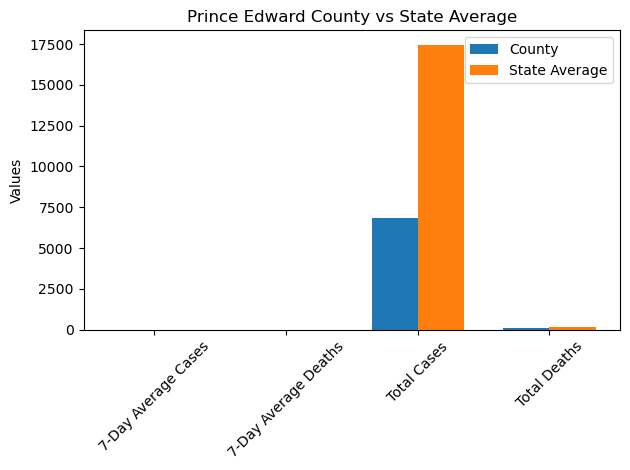

In [114]:
# Example usage with a county name and the path to the CSV file
# Normal that first two measures are 0, they are much smaller
csv_path = 'data/all_states_covid_data.csv'
plot_county_vs_state_avg('Prince Edward County', csv_path)

<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## 2. Bonus

For the bonus, we'll up the game a little bit. In the folder 'data' there are three files containing county information about cases, deaths and population. (covid_confirmed_usafacts.csv, covid_deaths_usafacts.csv, covid_county_population_usafacts.csv)
Explore these files and then load them using pandas. 
    
Next, come up with some questions you could ask the data set and answer using some preprocessing & data wrangling and, ultimately, visualizations. Note that the data for cases and deaths has a temporal dimension. Try to make use of that information.
    
For this task, we highly encourage you to work with pandas. We will give you an advanced introduction to pandas in session 5 if time allows it (depending on how comfortable you feel today in session 4). To solve the bonus task during session 4, you will need to study the pandas documentation yourself. 

In [115]:
# Note: Usually don't get to this part.

In [116]:
data = pd.read_csv('data/covid_confirmed_usafacts.csv')
data

# sample code how to group by column
# data.groupby(by="whatever_you_want_to").sum()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7241,7242,7242,7244,7244,7244,7244,7244,7247,7247
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,21868,21901,21901,21921,21921,21945,21945,21945,21985,21985
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2345,2345,2345,2344,2344,2344,2344,2344,2345,2345
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2685,2685,2685,2686,2686,2686,2686,2686,2687,2687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4677,4696,4699,4712,4723,4729,4729,4729,4739,4757
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,3797,3798,3798,3798,3798,3801,3801,3801,3801,3801
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,2302,2305,2308,2304,2305,2315,2315,2315,2318,2319
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,925,927,927,927,927,926,926,926,926,926
